In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import sqlite3
import mysql.connector as cnt
import plotly.express as px

In [2]:
import requests

In [3]:
url = 'https://api.meteo.lt/v1/stations'

page = requests.get(url)
status = page.status_code
print(status)

200


In [4]:
r = page.json()
print(r)
print(type(r))

[{'code': 'akmenes-ams', 'name': 'Akmenės AMS', 'coordinates': {'latitude': 56.24992, 'longitude': 22.73081}}, {'code': 'alytaus-ams', 'name': 'Alytaus AMS', 'coordinates': {'latitude': 54.412435, 'longitude': 24.063274}}, {'code': 'anyksciu-ams', 'name': 'Anykščių AMS', 'coordinates': {'latitude': 55.51735, 'longitude': 25.1178}}, {'code': 'birstono-ams', 'name': 'Birštono AMS', 'coordinates': {'latitude': 54.603217, 'longitude': 24.035802}}, {'code': 'birzu-ams', 'name': 'Biržų AMS', 'coordinates': {'latitude': 56.193191, 'longitude': 24.774184}}, {'code': 'dotnuvos-ams', 'name': 'Dotnuvos AMS', 'coordinates': {'latitude': 55.395993, 'longitude': 23.866224}}, {'code': 'druskininku-ams', 'name': 'Druskininkų AMS', 'coordinates': {'latitude': 54.018202, 'longitude': 23.980791}}, {'code': 'duksto-ams', 'name': 'Dūkšto AMS', 'coordinates': {'latitude': 55.517856, 'longitude': 26.31614}}, {'code': 'elektrenu-ams', 'name': 'Elektrėnų AMS', 'coordinates': {'latitude': 54.786161, 'longitude'

In [5]:
df = pd.DataFrame(data=r)
df.tail(10)

,code,name,coordinates
42,taurages-ams,Tauragės AMS,"{'latitude': 55.256786, 'longitude': 22.27802}"
43,telsiu-ams,Telšių AMS,"{'latitude': 55.991245, 'longitude': 22.256657}"
44,traku-ams,Trakų AMS,"{'latitude': 54.615924, 'longitude': 24.785292}"
45,ukmerges-ams,Ukmergės AMS,"{'latitude': 55.264145, 'longitude': 24.760335}"
46,utenos-ams,Utenos AMS,"{'latitude': 55.515321, 'longitude': 25.589692}"
47,varenos-ams,Varėnos AMS,"{'latitude': 54.248271, 'longitude': 24.55176}"
48,ventes-ams,Ventės AMS,"{'latitude': 55.340853, 'longitude': 21.189682}"
49,vezaiciu-ams,Vėžaičių AMS,"{'latitude': 55.7205, 'longitude': 21.4743}"
50,vilniaus-ams,Vilniaus AMS,"{'latitude': 54.625992, 'longitude': 25.107064}"
51,zarasu-ams,Zarasų AMS,"{'latitude': 55.742673, 'longitude': 26.250977}"


In [6]:
# raskite meteo stotelę, kuri užfiksavo didžiausią oro temperatūrą esamuoju metu.

# antra užduotis : Suraskite tris aukščiausią temperatūrą užfiksavusias stoteles,
# ir atvaizduokite grafiškai jų fiksuotą oro temperatūrą per paskutines tris dienas.

# https://api.meteo.lt/v1/stations/vilniaus-ams/observations/latest

codes = df.loc[:,'code'].values
print(codes)


['akmenes-ams' 'alytaus-ams' 'anyksciu-ams' 'birstono-ams' 'birzu-ams'
 'dotnuvos-ams' 'druskininku-ams' 'duksto-ams' 'elektrenu-ams'
 'jonavos-ams' 'joniskio-ams' 'jurbarko-ams' 'kaisiadoriu-ams'
 'kalvarijos-ams' 'kauno-ams' 'kazlu-rudos-ams' 'kelmes-ams'
 'klaipedos-ams' 'kretingos-ams' 'kupiskio-ams' 'kybartu-ams'
 'laukuvos-ams' 'lazdiju-ams' 'marijampoles-ams' 'mazeikiu-ams'
 'moletu-ams' 'nidos-ams' 'pagegiu-ams' 'pakruojo-ams' 'panevezio-ams'
 'plunges-ams' 'prienu-ams' 'raseiniu-ams' 'rietavo-ams' 'rokiskio-ams'
 'sakiu-ams' 'salcininku-ams' 'seduvos-ams' 'siauliu-ams' 'silutes-ams'
 'skuodo-ams' 'svencioniu-ams' 'taurages-ams' 'telsiu-ams' 'traku-ams'
 'ukmerges-ams' 'utenos-ams' 'varenos-ams' 'ventes-ams' 'vezaiciu-ams'
 'vilniaus-ams' 'zarasu-ams']


In [7]:
url = 'https://api.meteo.lt/v1/stations/vilniaus-ams/observations/latest'

page = requests.get(url)
status = page.status_code
print(status)
r = page.json()

# print(pd.DataFrame.from_dict(data))

df_pvz = pd.DataFrame.from_dict(r['observations'])
df_pvz.tail()

200


,observationTimeUtc,airTemperature,feelsLikeTemperature,windSpeed,windGust,windDirection,cloudCover,seaLevelPressure,relativeHumidity,precipitation,conditionCode
19,2024-10-09 10:00:00,17.2,17.2,6.4,10.2,144,38,1003.8,63,0,variable-cloudiness
20,2024-10-09 11:00:00,18.3,18.3,6.2,11.6,147,13,1003.0,60,0,partly-cloudy
21,2024-10-09 12:00:00,18.7,18.7,6.5,11.4,153,0,1002.4,60,0,clear
22,2024-10-09 13:00:00,18.6,18.6,5.9,10.8,145,0,1002.1,61,0,clear
23,2024-10-09 14:00:00,18.1,18.1,5.6,10.7,142,0,1001.9,65,0,clear


In [8]:
df_pvz['airTemperature'].max()

np.float64(18.7)

In [11]:
df_pvz.columns

Index(['observationTimeUtc', 'airTemperature', 'feelsLikeTemperature',
       'windSpeed', 'windGust', 'windDirection', 'cloudCover',
       'seaLevelPressure', 'relativeHumidity', 'precipitation',
       'conditionCode'],
      dtype='object')

In [9]:
max_station = None
max_temp = -100

for station in codes:
    
    url = f'https://api.meteo.lt/v1/stations/{station}/observations/latest'
    page = requests.get(url)
    status = page.status_code
    # print(status)
    r = page.json()
    df = pd.DataFrame.from_dict(r['observations'])
    # temp = df[df['observationTimeUtc'] == df.loc[23, 'observationTimeUtc']]['airTemperature'].max()
    temp = df[df['observationTimeUtc'] == df.iloc[-1, 0]]['airTemperature'].values
    
    
    if temp > max_temp:
        max_temp = temp
        max_station = station
print(max_station, max_temp)    
    

druskininku-ams [20.4]


druskininku-ams 20.4
varenos-ams 19.7
druskininku-ams 20.4


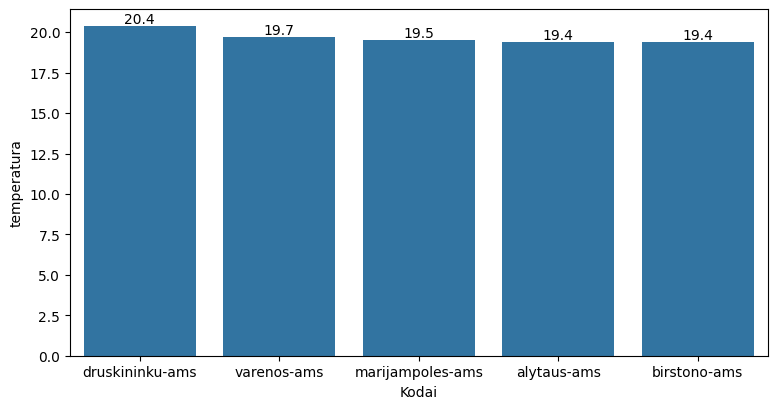

In [10]:
# antra užduotis : Suraskite tris aukščiausią temperatūrą užfiksavusias stoteles,
# ir atvaizduokite grafiškai jų fiksuotą oro temperatūrą per paskutines tris dienas.

temp1, temp2, temp3 = -100, -100, -100
station1, station2, station3 = None, None, None
temps = []


for station in codes:
    
    url = f'https://api.meteo.lt/v1/stations/{station}/observations/latest'
    page = requests.get(url)
    status = page.status_code
    # print(status)
    r = page.json()
    df = pd.DataFrame.from_dict(r['observations'])
    # temp = df[df['observationTimeUtc'] == df.loc[23, 'observationTimeUtc']]['airTemperature'].max()
    # patikrina didžiausias užfilsuotas temperatūras paskutinio matavimo metu
    temp = df[df['observationTimeUtc'] == df.iloc[-1, 0]]['airTemperature'].max()
    temps.append(temp)
    
    
    if temp > temp1:
        temp2 = temp1
        temp1 = temp
        station2 = station1
        station1 = station
    elif temp > temp2:
        temp3 = temp1
        temp2 = temp
        station3 = station1
        station2 = station
    elif temp > temp3:
        temp3 = temp
        station3 = station

df_temp = pd.DataFrame(data=codes, columns=['Kodai'])
df_temp['temperatura'] = temps
# df_temp.head()
df_temp_sorted = df_temp.sort_values(by=['temperatura'],ascending=False)[:5]
# df_temp_sorted.head()
print(station1, temp1)    
print(station2, temp2)    
print(station3, temp3)    
    
fig, axes = plt.subplots(figsize=(9,4.5))
sns.barplot(data=df_temp_sorted,x=df_temp_sorted['Kodai'],y=df_temp_sorted['temperatura'])
for container in axes.containers:
    axes.bar_label(container)
plt.show()

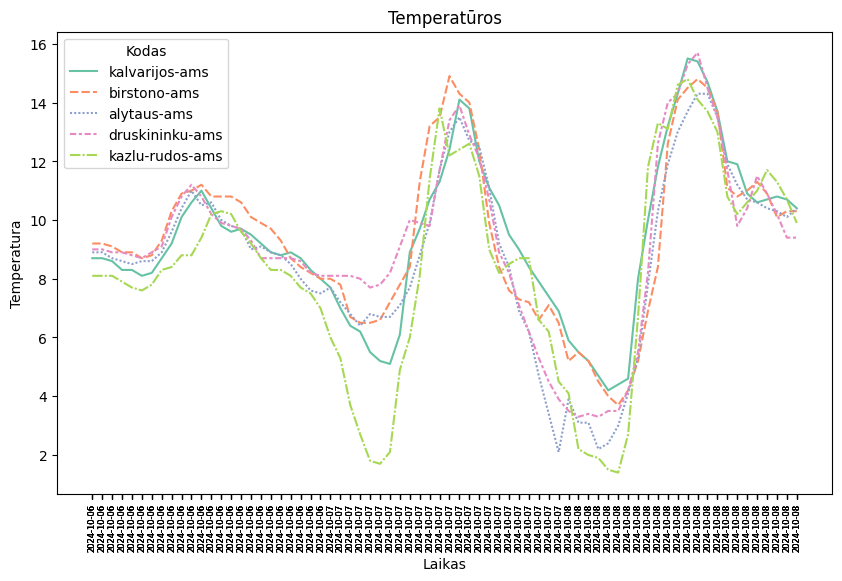

In [38]:
top_stations = list(df_temp_sorted['Kodai'])
dienos = ['2024-10-07', '2024-10-08', '2024-10-09']
stotys = []
data = []
temperatura = []

for d in dienos:
    for s in top_stations:
        url2 = f'https://api.meteo.lt/v1/stations/{s}/observations/{d}'
        observations = requests.get(url2).json()['observations']
        for o in observations:
            stotys.append(s)
            data.append(o['observationTimeUtc'])
            temperatura.append(o['airTemperature'])


ndf = pd.DataFrame(data)
ndf['Kodas'] = pd.DataFrame(data=stotys)
ndf['Temperatūros'] = pd.DataFrame(data=temperatura)
ndf['Data'] = pd.DataFrame(data=data)

ndf['Datos'] = pd.to_datetime(ndf['Data'])
ndf['Laikai'] = pd.to_datetime(ndf['Data']).dt.time

fig, axes = plt.subplots(figsize=(10,6))

axes.set_title('Temperatūros')
ax = sns.lineplot(data=ndf,x = 'Datos', y='Temperatūros', ax=axes, hue='Kodas', palette='Set2', style='Kodas')
axes.set(xlabel='Laikas',ylabel='Temperatura')
axes.set_xticks(data)
axes.tick_params(axis='x', rotation=90, labelsize=6)
for container in ax.containers:
    ax.bar_label(container)
plt.show()